In [105]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [106]:
# # # 1. Load and preprocess the data
# df = pd.read_csv('delaney-processed_morgan.csv')

In [107]:
# df

In [108]:
# df.columns

In [109]:
# # # Prepare features and target variable
# X = df.drop(['measured log solubility in mols per litre'], axis=1)
# y = df['measured log solubility in mols per litre']

In [110]:
# # # Split the data
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [111]:
# # # Normalize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

In [112]:
# # # # Add dropout and regularization
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras import regularizers
# # kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
# # kernel_regularizer=regularizers.l1(0.001)

In [113]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

In [114]:
# 2. Define the model
model = Sequential()
model.add(InputLayer(input_shape=(1030,)))  # Explicit input layer with 6 features
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(512, activation='selu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))  # Output layer

In [115]:
# Compile the model
from keras.optimizers import RMSprop, Nadam, Adamax, Adam, SGD

opt = Nadam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

In [116]:
# 3. Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_val_scaled, y_val), verbose=1)
# history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=10, validation_data=(X_val_scaled, y_val), verbose=1, callbacks=[early_stopping])

Epoch 1/200
79/79 [==============================] - 4s 8ms/step - loss: 12.9364 - mse: 3.1694 - val_loss: 11.5048 - val_mse: 1.9040
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 10.5311 - mse: 1.0588 - val_loss: 10.8221 - val_mse: 1.4737
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 9.7817 - mse: 0.5422 - val_loss: 10.4007 - val_mse: 1.2693
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 9.2821 - mse: 0.2508 - val_loss: 10.0181 - val_mse: 1.0879
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 8.9948 - mse: 0.1604 - val_loss: 9.9899 - val_mse: 1.2530
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 8.7861 - mse: 0.1426 - val_loss: 9.6936 - val_mse: 1.1454
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 8.5838 - mse: 0.1272 - val_loss: 9.4379 - val_mse: 1.0753
Epoch 8/200
79/79 [==============================] - 0s 6ms/step - loss: 8.37

In [117]:
# 4. Evaluate the model
test_loss, test_mse = model.evaluate(X_test_scaled, y_test, verbose=1)

6/6 [==============================] - 0s 2ms/step - loss: 1.0463 - mse: 0.9950


In [118]:
# Make predictions
y_pred = model.predict(X_test_scaled)

6/6 [==============================] - 0s 2ms/step


In [119]:
# Calculate R^2 and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {np.sqrt(test_mse)}")
print(f"Test R^2: {r2}")
print(f"Test MAE: {mae}")

Test MSE: 0.9950377345085144
Test RMSE: 0.9975157815836873
Test R^2: 0.7564379504941793
Test MAE: 0.7406903857953407


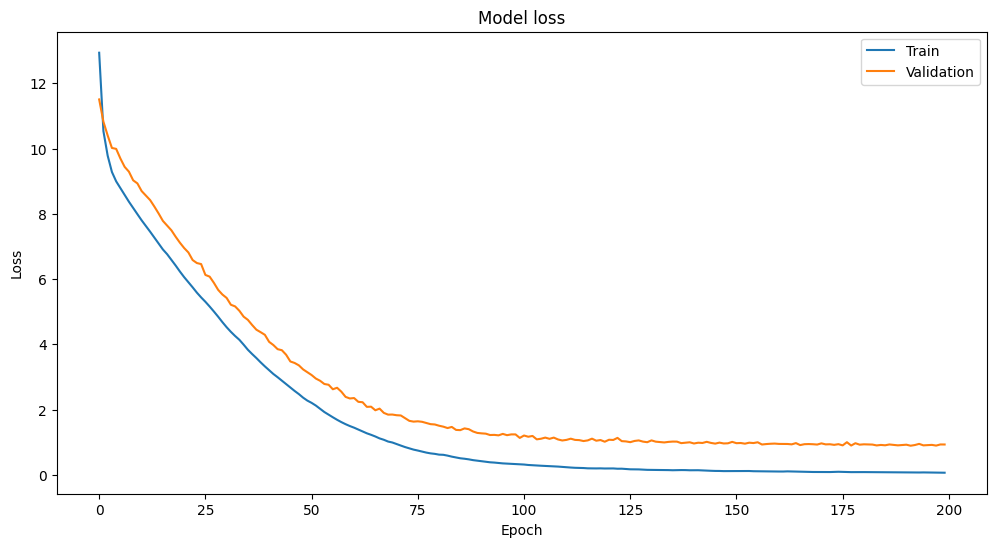

In [120]:
# 5. Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()